In [ ]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import pandas as pd
data = pd.read_csv('final_d2.csv')

In [ ]:
data['cleaned_column'] = data['cleaned_column'].astype(str)

In [ ]:
corpus = data['cleaned_column'].values

In [ ]:
print(corpus)

In [ ]:

tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'delivery': 1, 'free': 2, 'new': 3, 'offer': 4, 'uk': 5, 'buying': 6, 'choice': 7, 'buy': 8, 'prime': 9, 'eligible': 10, 'order': 11, 'get': 12, 'game': 13, 'online': 14, 'aug': 15, 'baby': 16, 'car': 17, 'sale': 18, 'day': 19, 'rating': 20, 'nan': 21, 'plant': 22, 'price': 23, 'shop': 24, 'accessory': 25, 'stock': 26, 'tool': 27, 'google': 28, 'part': 29, 'deal': 30, 'save': 31, 'video': 32, 'amazon': 33, 'shoe': 34, 'follower': 35, 'monday': 36, 'tv': 37, 'www': 38, 'cheap': 39, 'auto': 40, 'product': 41, 'dvd': 42, 'xbox': 43, 'return': 44, 'x': 45, 'review': 46, 'fast': 47, 'black': 48, 'used': 49, 'beauty': 50, 'g': 51, 'argo': 52, 'playstation': 53, 'blue': 54, 'shipping': 55, 'outdoor': 56, 'men': 57, 'slim': 58, 'gift': 59, 'care': 60, 'option': 61, 'help': 62, 'u': 63, 'find': 64, 'great': 65, 'next': 66, 'today': 67, 'available': 68, 'best': 69, 'gadget': 70, 'world': 71, 'cream': 72, 'pack': 73, 'blu': 74, 'ray': 75, 'range': 76, 'camera': 77, 'samsun

In [ ]:

input_sequences = []


for line in corpus:

	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		
		n_gram_sequence = token_list[:i+1]

		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:

sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

token_list = []

for word in sentence: 
  token_list.append(tokenizer.word_index[word])

print(token_list)

sample sentence: ['blue', 'shoe', 'free', 'shipping', 'exchange', 'return', 'blue', 'shoe', 'anesshoescom', 'code', 'blue', 'wwwanesshoescomcolors']
[54, 34, 2, 55, 291, 44, 54, 34, 292, 149, 54, 293]


In [ ]:
elem_number = 10

print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  54  34   2  55 291  44  54  34
 292 149  54]
decoded to text: ['blue shoe free shipping exchange return blue shoe anesshoescom code blue']


In [ ]:

print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 293


In [ ]:

elem_number = 10


print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')


print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  54  34   2  55 291  44  54  34
 292 149  54]
decoded to text: ['blue shoe free shipping exchange return blue shoe anesshoescom code blue']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 293


In [ ]:

model = Sequential([
          Embedding(total_words, 64, input_length=max_sequence_len-1),
          Bidirectional(LSTM(20)),
          Dense(total_words, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 64)            67648     
                                                                 
 bidirectional (Bidirectiona  (None, 40)               13600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1057)              43337     
                                                                 
Total params: 124,585
Trainable params: 124,585
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
63/63 [==============================] - 7s 33ms/step - loss: 6.9058 - accuracy: 0.0130
Epoch 2/500
63/63 [==============================] - 2s 34ms/step - loss: 6.4940 - accuracy: 0.0206
Epoch 3/500
63/63 [==============================] - 2s 34ms/step - loss: 6.2882 - accuracy: 0.0251
Epoch 4/500
63/63 [==============================] - 2s 33ms/step - loss: 6.1918 - accuracy: 0.0251
Epoch 5/500
63/63 [==============================] - 4s 58ms/step - loss: 6.1284 - accuracy: 0.0266
Epoch 6/500
63/63 [==============================] - 2s 33ms/step - loss: 6.0766 - accuracy: 0.0271
Epoch 7/500
63/63 [==============================] - 2s 34ms/step - loss: 6.0203 - accuracy: 0.0276
Epoch 8/500
63/63 [==============================] - 2s 34ms/step - loss: 5.9599 - accuracy: 0.0271
Epoch 9/500
63/63 [==============================] - 2s 33ms/step - loss: 5.8982 - accuracy: 0.0271
Epoch 10/500
63/63 [==============================] - 3s 44ms/step - loss: 5.8277 - accuracy: 0.0316

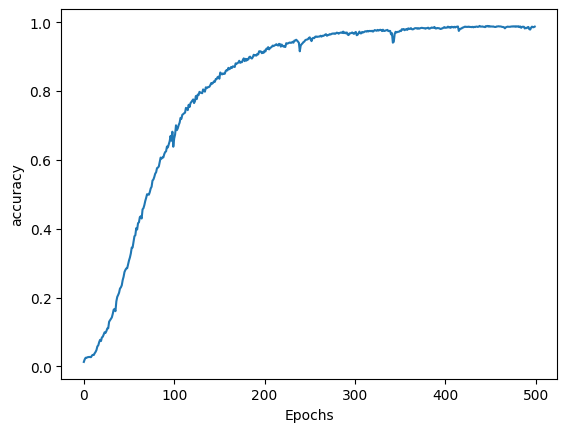

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [ ]:

seed_text = "video game"

next_words = 100

for _ in range(next_words):

  token_list = tokenizer.texts_to_sequences([seed_text])[0]

  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

  probabilities = model.predict(token_list)

  choice = np.random.choice([1,2,3])

  predicted = np.argsort(probabilities)[0][-choice]

  if predicted != 0:

	  output_word = tokenizer.index_word[predicted]

	  seed_text += " " + output_word
	
print(seed_text)

1/1 [==============================] - 0s 36ms/step
Mobile essential black in2h15 tv high lavender www set shake powder buying g left stock order order soon buying aug choice new gift offer kindle mp3 new mp3 new mp3 mp3 help mp3 oar men point mp3 download peter roe point mp3 oar road construction enjoy cheap follower si8s0am add dvd eurocarparts hidden insulation new favourite stroller port argo save argo argo contact travel new return retailer unwrapped bar clothing super oxfam clothes uk follower google men men woman clothing selection cream bar sale selection 100g detailed product read shop follower follower get regular follower follower follower contact google household insulation
